In [66]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting

# Hydrogen

Quick uncertainties check:  [array([2.18839791e-10, 3.66826613e-10, 1.55760228e-09, 4.94376817e-10]), array([5.95280852e-05, 9.33960868e-05, 1.10711929e-04, 1.20647102e-04])]
Theoretical Rydberg Constant: 10967800.0. 
 Experimental Rydberg Constant 10991714.79380364. 
 Difference: 23914.79380363971


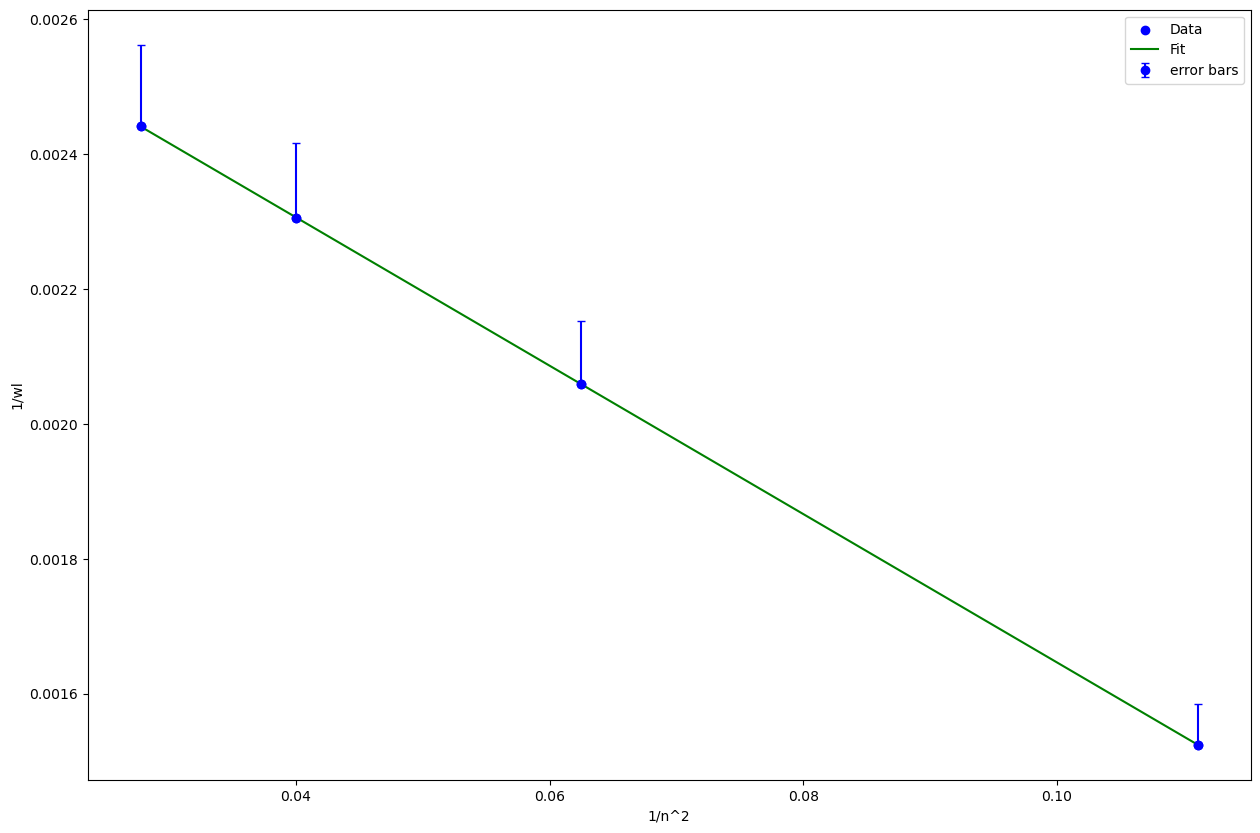

In [92]:
# General Constants

R_H = 1.09678E7 # Rydberg Constant (for Hydrogen)
n = np.arange(3, 7)
wl = np.array([655.9217890603793, 485.78885458930495, 433.7142810287651, 409.5642773103868])
raw_uncertainties = np.array([8.86463410e-09, 7.49396840e-09, 8.58475762e-08, 6.87708628e-09])
uncertainties = []

######################
# Need Uncertainties
# For plotting error
# bars.
######################

for each in raw_uncertainties, wl:
    fix = np.sqrt(each) / wl**2
    uncertainties.append(fix)

print("Quick uncertainties check: ", uncertainties)


#################
# Data Analysis
#################

# Data fit
a, b = np.polyfit(1/n**2, 1/wl, 1)
fit = a*(1/n**2) + b  # Use the same x-values as in the scatter plot

# Quick Check for accuracy:
ryd_exp_H = -1 * a * 1E9
print(f"Theoretical Rydberg Constant: {R_H}. \n Experimental Rydberg Constant {ryd_exp}. \n Difference: {abs(R_H-ryd_exp)}")

# RB Function:
func = -R_H*(1/n**2) + b


#########
# Plot
#########

plt.figure(figsize=(15,10)) # make figure bigger
plt.scatter(1/n**2, 1/wl, c='b', label='Data')  # scatter plot of raw data
plt.plot(1/n**2, fit, c='g', label='Fit')  # plot line of best fit
plt.errorbar(1/n**2, 
             1/wl,
             yerr = uncertainties, 
             fmt ='o',
             c='b',
             capsize=3,
             label='error bars') # plot error bars
plt.xlabel('1/n^2') # Label for x-axis
plt.ylabel('1/wl') # Label for y-axis
plt.legend() # create legend
plt.show() # show plot

# Deuterium

Quick uncertainties check:  [array([2.18725299e-10, 3.66633550e-10, 1.55676608e-09, 4.93959812e-10]), array([5.95047258e-05, 9.33592182e-05, 1.10667349e-04, 1.20570770e-04])]
Theoretical Rydberg Constant: 10970000.0. 
 Experimental Rydberg Constant 10991714.79380364. 
 Difference: 21714.79380363971


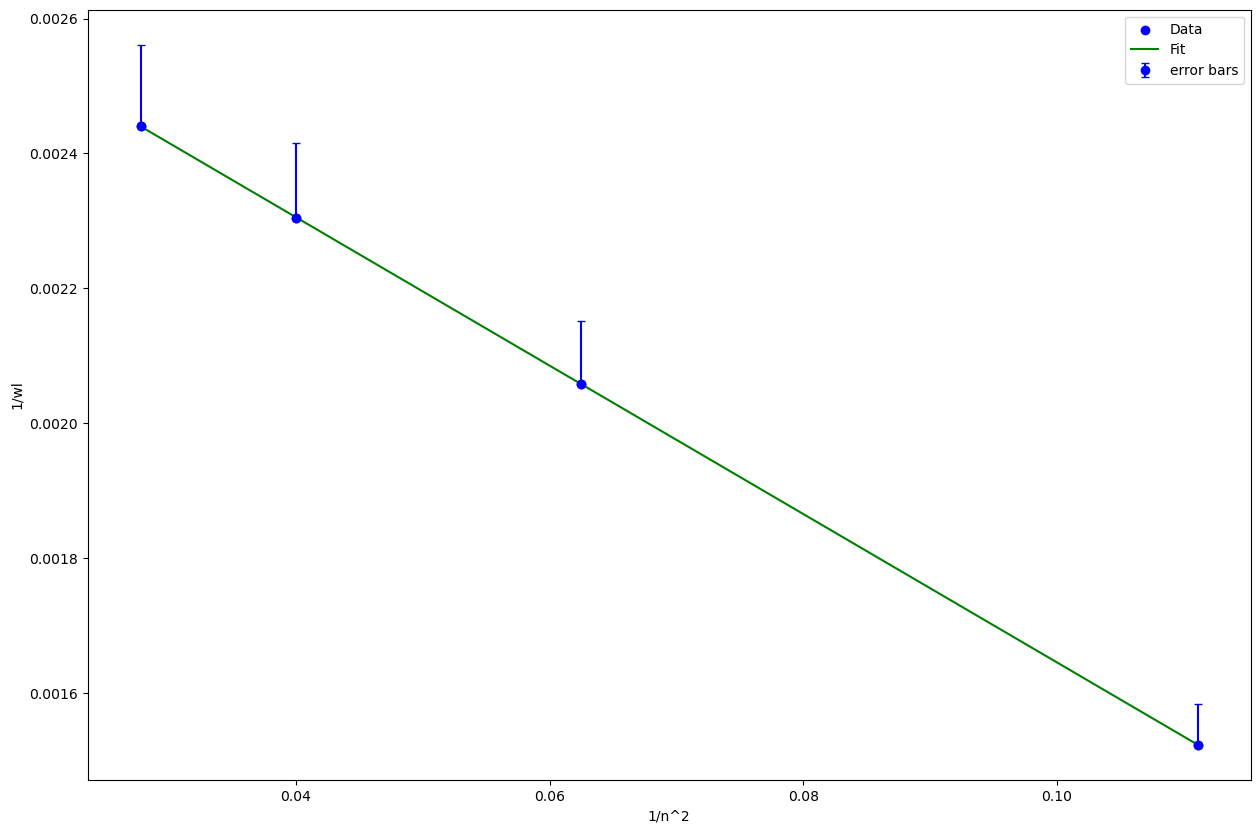

In [93]:
# General Constants
R_D =  1.0970E7
wl = np.array([656.0934381861541, 485.9167418903065, 433.8307473764934, 409.7371194739568])
raw_uncertainties = np.array([8.86463410e-09, 7.49396840e-09, 8.58475762e-08, 6.87708628e-09])
uncertainties = []

######################
# Need Uncertainties
# For plotting error
# bars.
######################

for each in raw_uncertainties, wl:
    fix = np.sqrt(each) / wl**2
    uncertainties.append(fix)

print("Quick uncertainties check: ", uncertainties)


#################
# Data Analysis
#################

# Data fit
a, b = np.polyfit(1/n**2, 1/wl, 1)
fit = a*(1/n**2) + b  # Use the same x-values as in the scatter plot

# Quick Check for accuracy:
ryd_exp_D = -1 * a * 1E9
print(f"Theoretical Rydberg Constant: {R_D}. \n Experimental Rydberg Constant {ryd_exp}. \n Difference: {abs(R_D-ryd_exp)}")

# RB Function:
func = -R_D*(1/n**2) + b


#########
# Plot
#########

plt.figure(figsize=(15,10)) # make figure bigger
plt.scatter(1/n**2, 1/wl, c='b', label='Data')  # scatter plot of raw data
plt.plot(1/n**2, fit, c='g', label='Fit')  # plot line of best fit
plt.errorbar(1/n**2, 
             1/wl,
             yerr = uncertainties, 
             fmt ='o',
             c='b',
             capsize=3,
             label='error bars') # plot error bars
plt.xlabel('1/n^2') # Label for x-axis
plt.ylabel('1/wl') # Label for y-axis
plt.legend() # create legend
plt.show() # show plot

In [96]:
theor_R_diff = abs(R_D-R_H)
exp_R_diff = abs(ryd_exp_D-ryd_exp_H)

print(f"The difference between the theoretical solved Rydberg constants of Hydrogen and Deuterium is {theor_R_diff} \n but our experimentally solved for difference is {exp_R_diff}.")

The difference between the theoretical solved Rydberg constants of Hydrogen and Deuterium is 2200.0 
 but our experimentally solved for difference is 6095.5095210354775.
